In [1]:
#imports

import pandas as pd
import matplotlib.pyplot as plt
import os


In [2]:
# Import the cleaned data

df= pd.read_csv("data_cle.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  int64  
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   City              185950 non-null  object 
 7   Total Price       185950 non-null  float64
 8   Month             185950 non-null  int64  
 9   Day               185950 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 14.2+ MB


- What was the best month for sales? How much was earned that month?

In [4]:
df.groupby('Month').sum()['Total Price']

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Total Price, dtype: float64

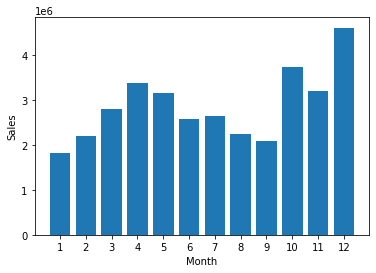

In [5]:
plt.bar(sorted(df.Month.unique()), df.groupby('Month').sum()['Total Price'])
plt.xticks(sorted(df.Month.unique()))
plt.ylabel('Sales')
plt.xlabel('Month')
#plt.text(df.groupby('Month').sum()['Total Price'])
plt.show()

What city sold the most product?

In [6]:
df.groupby('City').sum()['Total Price']

City
Atlanta(GA)          2795498.58
Austin(TX)           1819581.75
Boston(MA)           3661642.01
Dallas(TX)           2767975.40
Los Angeles(CA)      5452570.80
New York City(NY)    4664317.43
Portland(ME)          449758.27
Portland(OR)         1870732.34
San Francisco(CA)    8262203.91
Seattle(WA)          2747755.48
Name: Total Price, dtype: float64

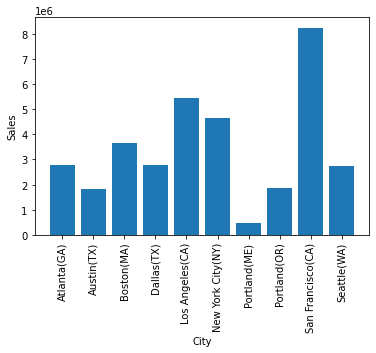

In [7]:
plt.bar(sorted(df.City.unique()), df.groupby('City').sum()['Total Price'])
plt.xticks(sorted(df.City.unique()), rotation='vertical')
plt.ylabel('Sales')
plt.xlabel('City')
#plt.text(df.groupby('Month').sum()['Total Price'])
plt.show()

- What products are most often sold together?


In [8]:
df_new = df[df['Order ID'].duplicated(keep=False)].copy(deep=True)

In [9]:
df_new.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,Total Price,Month,Day
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles(CA),600.00,4,12
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles(CA),11.99,4,12
17,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",Los Angeles(CA),600.00,4,3
18,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",Los Angeles(CA),11.95,4,3
29,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",Boston(MA),99.99,4,7


In [10]:
df_new['Grouped'] = df_new.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

In [11]:
df_new.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,Total Price,Month,Day,Grouped
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles(CA),600.00,4,12,"Google Phone,Wired Headphones"
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles(CA),11.99,4,12,"Google Phone,Wired Headphones"
17,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",Los Angeles(CA),600.00,4,3,"Google Phone,USB-C Charging Cable"
18,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",Los Angeles(CA),11.95,4,3,"Google Phone,USB-C Charging Cable"
29,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",Boston(MA),99.99,4,7,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [12]:
df_new = df_new[['Order ID', 'Grouped']].drop_duplicates()

In [13]:
df_new.head()

,Order ID,Grouped
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [14]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df_new['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))

In [15]:
count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

- What product sold the most? Why do you think it sold the most?

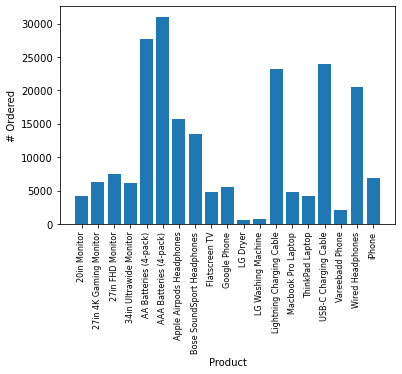

In [16]:
plt.bar(sorted(df.Product.unique()), df.groupby('Product').sum()['Quantity Ordered'])

plt.xticks(sorted(df.Product.unique()), rotation='vertical', size=8)
plt.ylabel('# Ordered')
plt.xlabel('Product')

plt.show()


Check correlation between product price and quantity sold

C:\Users\Dilimou\AppData\Local\Temp/ipykernel_23640/2030722213.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(sorted(df.Product.unique()), rotation='vertical', size=8)


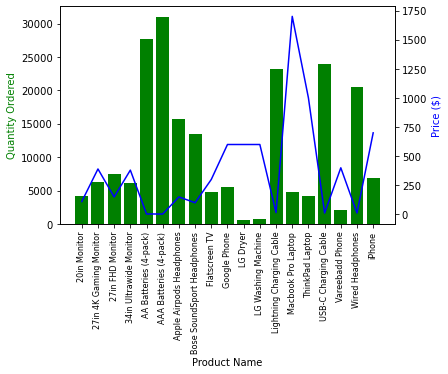

In [17]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(sorted(df.Product.unique()), df.groupby('Product').sum()['Quantity Ordered'], color='g')
ax2.plot(sorted(df.Product.unique()), df.groupby('Product').mean()['Price Each'], 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(sorted(df.Product.unique()), rotation='vertical', size=8)

plt.show()

